In [26]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")

Loading Iris data

In [3]:
dataset=pd.read_excel('iris1.xls')
dataset.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

filling null values with average

In [6]:
dataset['SL'].fillna((dataset['SL'].mean()), inplace=True)

In [7]:
dataset['SW'].fillna((dataset['SW'].mean()), inplace=True)

In [8]:
dataset['PL'].fillna((dataset['PL'].mean()), inplace=True)

In [9]:
dataset.shape

(150, 5)

In [10]:
dataset.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
dataset.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
dataset['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

**Data Visualization**

Violin plot
Plotting the violin plot to check the comparison of a variable distribution:

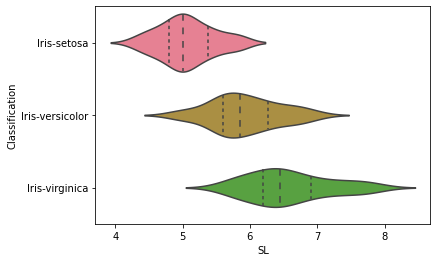

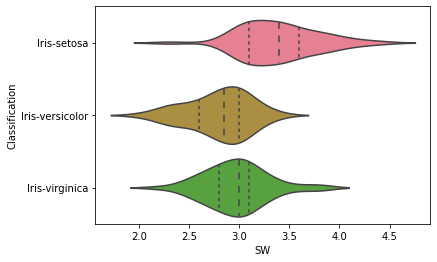

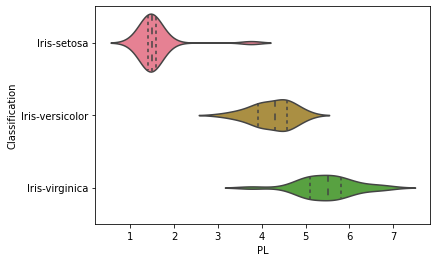

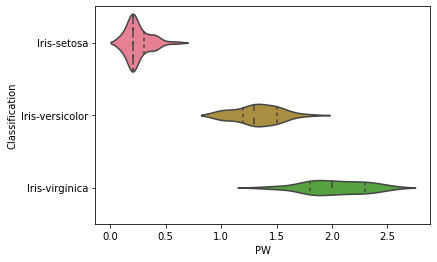

In [14]:
sns.violinplot(y='Classification', x='SL', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Classification', x='SW', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Classification', x='PL', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Classification', x='PW', data=dataset, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

**Pair plot**
Plotting multiple pairwise bivariate distributions in a dataset using pairplot:

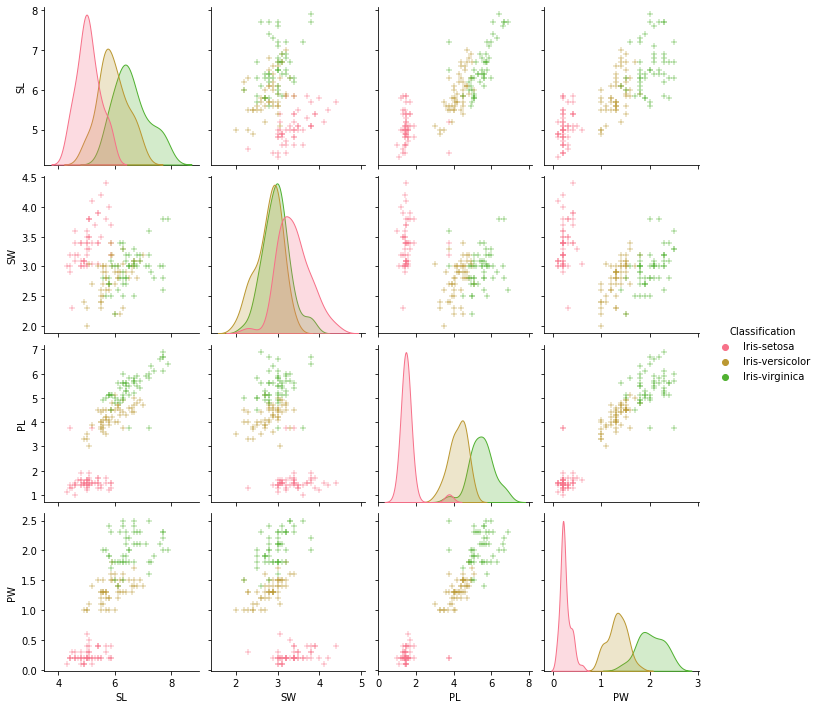

In [15]:
sns.pairplot(dataset, hue='Classification', markers='+')
plt.show()

From the above, we can see that Iris-Setosa is separated from both other species in all the features.

**Heatmap**
Plotting the heatmap to check the correlation.
dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

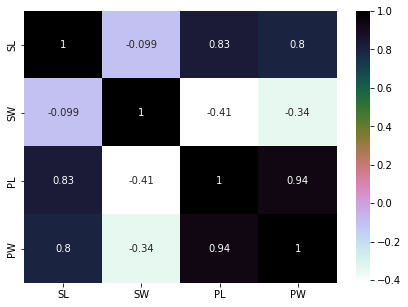

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

**Model Buildin**g
Splitting the dataset
X is having all the dependent variables.
Y is having an independent variable (here in this case ‘class’ is an independent variable).

In [18]:
X = dataset.drop(['Classification'], axis=1)
y = dataset['Classification']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


Here, we can see from the output that the X has 150 rows and 4 columns whereas Y has 150 rows and only one column.

**Train Test split**

Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [41]:
print("X_train :",X_train.shape)
print("X_test  :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test  :",y_test.shape)

X_train : (120, 4)
X_test  : (30, 4)
y_train : (120,)
y_test  : (30,)


**Model Creation**

We don’t know which algorithms would be best for this problem.
Let’s check each algorithm in loop and print its accuracy, so that we can select our best algorithm.

Let’s test  different algorithms:



*   Logistic Regression (LR)
*   K-Nearest Neighbors (KNN).
*   random forest
*   SVC












**Logistic Regression**

In [31]:
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_prediction = logic_model.predict(X_test)

In [33]:
accuracy_score(y_test,y_prediction)

0.9

**KNN**

In [46]:
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train, y_train)
y_prtd=knn.predict(X_test)
accuracy_score(y_test,y_prtd)

0.9666666666666667

**SVC**

In [34]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_predict=linear.predict(X_test)
accuracy_score(y_test,y_predict)


0.9666666666666667

In [35]:
svm_poly=SVC(kernel='poly',degree=12)
svm_poly.fit(X_train,y_train)
y_pre=svm_poly.predict(X_test)
accuracy_score(y_test,y_pre)

0.9666666666666667

**Random Forest**

In [36]:
rand_for=RandomForestClassifier()
rand_for.fit(X_train,y_train)
y_predic=rand_for.predict(X_test)
accuracy_score(y_test,y_predic)

0.9666666666666667

In [37]:
raft = RandomForestClassifier(n_estimators = 100, max_depth=15, random_state=42, criterion = "entropy")
raft.fit(X_train, y_train)
y_prdt = raft.predict(X_test)
accuracy_score(y_test,y_prdt)

0.9666666666666667

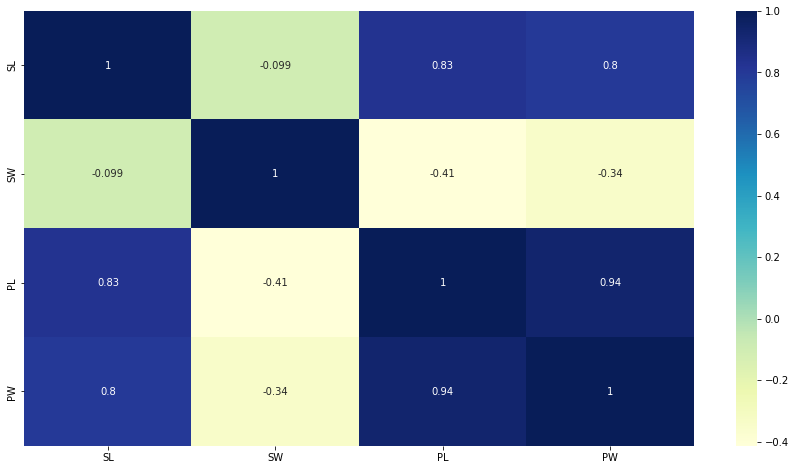

In [39]:
corrmatrix = dataset.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix , annot =True , cmap ="YlGnBu")